### **16.Регуляризация А.Н. Тихонова**

Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется регуляризованной по отношению к системе $Ax = b$. Параметр $\alpha$ называется параметром регуляризации. Метод регуляризации А.Н.\,Тихонова заключается в выборе последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) и решении регуляризованных систем $(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа значений $\alpha_k$, и выборе из всех полученных решений того, при котором норма невязки для исходной системы минимальна.

Написать функцию

    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
в которой A и b – матрица и левая часть исходной системы, alpha – вектор, содержащий набор параметров регуляризации, x – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, discr – вектор полученных таким образом невязок, x0 – регуляризованное решение (из найденных) с минимальной нормой невязки, discr0, alpha0 – соответствующие ему значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Построить график зависимости ошибки и нормы невязки от порядка системы.

Для конкретной системы построить графики зависимости ошибки и нормы невязки от параметра alpha.

Интуиция: Система $(A^{\rm T}A+αE)x=A^{\rm T}b$ при маленьком $α\ge 0$ (например, $α=0$) может быть вырожденной или плохо обусловленной, что приводит к большим ошибкам при численном решении системы. При большом $α$ система хорошо обусловлена, но может слишком сильно отличаться от исходной системы $Ax=b$. Нужно найти компромисс, т.е. «оптимальное» значение $α$: не очень большое и не очень маленькое.

---

In [1]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

Напишем функцию для решения регуляризованных систем $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ и выбора минимальной нормы невязки.

На вход поступает матрица, вектор и последовательность параметров регуляризации

Далее создаются необходимые переменные и производится решение системы для каждого параметра регуляризации с помощью функции `linalg.solve()` из модуля scipy. Каждое решение заносится в отдельную матрицу x с помощью функции `np.hstack()`. В итоге получим, что в ней по столбцам будут записаны регуляризованные решения для соответсвующего значения параметра регуляризации. 
Также для каждого решения находится норма невязки, которая находится с помощью функции `linalg.norm()` и подставления в неё формулы для нахождения невязки *A.dot(x_column) - b*.


In [2]:
def tikhonov(A, b, alpha):
  E = np.eye(A.shape[0])
  x = np.array([])
  discr = np.array([])
  for i in alpha:
    x_column = linalg.solve(A.transpose().dot(A) + i*E, A.transpose().dot(b))
    if i == alpha[0]: 
      x = x_column
    else:
      x = np.hstack((x, x_column))
    discr = np.append(discr, linalg.norm(A.dot(x_column) - b))
  discr0 = min(discr)
  x0 = x[ :, list(discr).index(discr0)]
  alpha0 = alpha[list(discr).index(discr0)]
  return x0, discr0, alpha0, x, discr

Создание плохообусловленных систем из № 8, создание векторов для них

In [3]:
Univ = [] # Массив матриц А
UnivB = [] # Массив векторов b
UnivShapes = [] # Массив размерностей A
for i in range(5, 150):
  A = np.tril(np.random.rand(i//5,i//5)).dot(np.triu(np.random.rand(i//5,i//5)))
  Univ.append(A)
  UnivB.append(np.random.rand(i//5,1))
  UnivShapes.append(int(A.shape[0]))

Создаём переменную alpha, которая содержит в себе набор параметров регуляризации

In [5]:
alpha = np.linspace(0.01, 1, 500)

Решим системы:

In [6]:
discrs = []
for i in range(0, len(Univ)):
  x0, discr0, alpha0, x, discr = tikhonov(Univ[i], UnivB[i], alpha)
  discrs.append(discr0)

Покажем на графике зависимости ошибки и нормы невязки от порядка системы

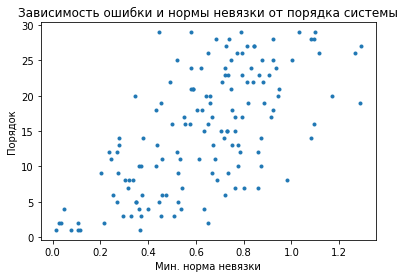

In [7]:
plt.xlabel("Мин. норма невязки")
plt.ylabel("Порядок")
plt.title("Зависимость ошибки и нормы невязки от порядка системы")
plt.plot(discrs, UnivShapes, '.')
pass

Теперь возьмём рандомную матрицу и вектор к ней. Изобразим на графиках зависимость ошибки и нормы невязки от параметра alpha

In [37]:
A = np.random.rand(5,5)
b = np.random.rand(5,1)

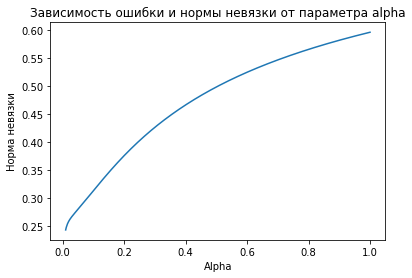

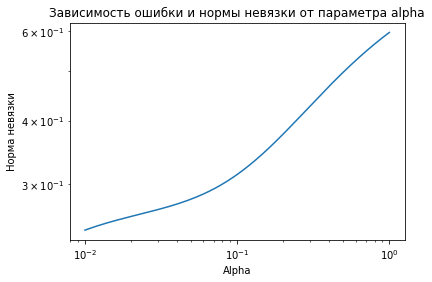

In [38]:
x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha)
plt.ylabel("Норма невязки")
plt.xlabel("Alpha")
plt.title("Зависимость ошибки и нормы невязки от параметра alpha")
plt.plot(alpha, discr)
plt.show()
plt.ylabel("Норма невязки")
plt.xlabel("Alpha")
plt.title("Зависимость ошибки и нормы невязки от параметра alpha")
plt.loglog(alpha, discr)
pass